<img src="http://www.cems.uwe.ac.uk/~pa-legg/images/uwe_banner.png">

# UFCFEL-15-3 Security Data Analytics and Visualisation
# Portfolio Assignment 2: Machine Learning for Malware Analysis (2022)
---

The completion of this worksheet is worth a **maximum of 35 marks** towards your portfolio assignment for the UFCFEL-15-3 Security Data Analytics and Visualisation (SDAV) module.

### Brief
---

In this task, you have been given a large sample of derived malware features that describe 14 different malware variants (2000 samples of each). The purpose of this task is to understand the underlying concepts of classification, and **your task will be to develop two classifiers that can classify malware varients**. The first part will focus on a small hand-made classifier using only 3 malware classes, to understand the principles of search space and minimisation of a function. The second part will focus on using off-the-shelf libraries to scale up the classification to all 14 classes of malware present in the dataset.

### Assessment and Marking
---

For each question you will see the maximum number of marks you may be awarded for a complete answer in brackets.

**Part 1: Developing a Classifier "by hand" - (Total Marks: 20)**

* **Task 1:** Find the Centroid point of each of the three groups (3)
* **Task 2:** Plot the centroids on a Scatter Plot against the train data colour-coded by group (3)
* **Task 3:** For each item in test_data, measure the distance to each centroid point, assign membership to the group of minimum distance, and compare with the expected test data label to obtain a score of successful classifications (12)
* **Task 4:** Provide a final accuracy score for the performance of your "by hand" classifier (2)

**Part 2: Developing a large-scale ML classifier - (Total Marks: 15)**

* **Task 5:** Scale the Input Features for further processing using the StandardScaler function (1)
* **Task 6:** Obtain numerical labels for each class using the LabelEncoder function (1)
* **(Advanced) Task 7:** Prepare the dataset for ML testing, using the Train-Test-Split function of sklearn (2)
* **(Advanced) Task 8:** Use a Multi-Layer Perceptron (MLP) classifier to train a machine learning model, and obtain the accuracy score against your test data. (4)
* **(Advanced) Task 9:** Use a Random Forest (RF) classifier to train a machine learning model, and obtain the accuracy score against your test data. (4)
* **(Advanced) Task 10:** Show how ML parameters can improve the models to achieve a high accuracy score of over 80% (3)

This assignment should be submitted as as PDF to your Blackboard portfolio submission as per the instructions in the assignment specification available on Blackboard. A copy of your work should also be provided via a UWE Gitlab repository, with an accessible link provided with your portfolio.
 
### Contact
---

Questions about this assignment should be directed to your module leader (Phil.Legg@uwe.ac.uk). You can use the Blackboard Q&A feature to ask questions related to this module and this assignment, as well as the on-site teaching sessions.

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
features = pd.read_csv('./T2_data/malware_data.csv', header=None)
features

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,224862.0,15842.0,12985.0,7387.0,13132.0,5112.0,8661.0,7990.0,14978.0,5656.0,...,3714.0,2892.0,9344.0,2415.0,2742.0,3023.0,11949.0,3662.0,5552.0,77433.0
1,21802.0,2127.0,2076.0,2028.0,1871.0,1622.0,1939.0,1502.0,2133.0,1689.0,...,1664.0,1607.0,1788.0,1394.0,1327.0,1453.0,1785.0,1559.0,1755.0,4882.0
2,24407.0,11682.0,7189.0,6538.0,7687.0,6848.0,4974.0,5377.0,7049.0,11642.0,...,5795.0,6053.0,6426.0,5435.0,4961.0,5026.0,5376.0,4180.0,5685.0,5775.0
3,7132.0,461.0,647.0,371.0,581.0,269.0,646.0,262.0,243.0,165.0,...,151.0,276.0,299.0,294.0,294.0,354.0,506.0,569.0,940.0,1516.0
4,5321.0,1108.0,985.0,955.0,958.0,890.0,971.0,919.0,945.0,963.0,...,933.0,975.0,945.0,924.0,879.0,952.0,956.0,900.0,942.0,1559.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,23849.0,1489.0,1573.0,2649.0,1560.0,1025.0,922.0,1020.0,1042.0,938.0,...,993.0,968.0,1165.0,1041.0,1258.0,1753.0,1203.0,958.0,1315.0,4342.0
27996,9267.0,1056.0,981.0,930.0,1573.0,819.0,879.0,1064.0,1029.0,893.0,...,998.0,911.0,990.0,1039.0,930.0,833.0,904.0,891.0,976.0,2683.0
27997,25357.0,874.0,1008.0,2781.0,1518.0,939.0,4267.0,968.0,1103.0,1032.0,...,563.0,557.0,974.0,706.0,514.0,632.0,657.0,584.0,535.0,2431.0
27998,29010.0,6476.0,2969.0,5358.0,2827.0,4598.0,2172.0,4045.0,2496.0,3718.0,...,217.0,146.0,544.0,232.0,95.0,140.0,294.0,163.0,182.0,4005.0


In [3]:
labels = pd.read_csv('./T2_data/malware_label.csv', header=None)
labels = labels.drop(0, axis=1)
labels = labels.rename(columns = {1:'label'})
labels

,label
0,high
1,high
2,high
3,high
4,high
...,...
27995,zbot
27996,zbot
27997,zbot
27998,zbot


In the cells above, we have created two DataFrames: ***features*** and ***labels***.

***Features***: This table contains 28000 instances of malware, where each instance of malware is characterised by 256 distinct features relating to how it performs and its impact on the associated systems.

***Labels***: This table contains 28000 rows, where each row is the label of the malware class, related to the features table. There are 2000 samples of each malware varient, and 14 varients in total.

## Part 1: Developing a Classifier "by hand"

In [4]:

# DO NOT MODIFY THIS CELL - this cell is splitting the data to provide a suitable subset of data to work with for this task.
# If you change this cell your output will differ from that expected and could impact your mark.


mal1_index = 17000
mal2_index = 21000
mal3_index = 12000
mal_range = 50
mal_test_range = 30

train_data = np.vstack([ features[mal1_index:mal1_index+mal_range][[0,1]].values, features[mal2_index:mal2_index+mal_range][[0,1]].values, features[mal3_index:mal3_index+mal_range][[0,1]].values ])
train_data = pd.DataFrame(train_data)
train_labels = np.vstack([ labels[mal1_index:mal1_index+mal_range].values, labels[mal2_index:mal2_index+mal_range].values, labels[mal3_index:mal3_index+mal_range].values ])
train_labels = pd.DataFrame(train_labels)
train_data['labels'] = train_labels
train_data = train_data.rename(columns={0:'x', 1:'y'})

test_data = np.vstack([ features[mal1_index+mal_range:mal1_index+mal_range+mal_test_range][[0,1]].values, features[mal2_index+mal_range:mal2_index+mal_range+mal_test_range][[0,1]].values, features[mal3_index+mal_range:mal3_index+mal_range+mal_test_range][[0,1]].values ])
test_data = pd.DataFrame(test_data)
test_labels = np.vstack([ labels[mal1_index+mal_range:mal1_index+mal_range+mal_test_range].values, labels[mal2_index+mal_range:mal2_index+mal_range+mal_test_range].values, labels[mal3_index+mal_range:mal3_index+mal_range+mal_test_range].values ])
test_labels = pd.DataFrame(test_labels)
test_data['labels'] = test_labels
test_data = test_data.rename(columns={0:'x', 1:'y'})

train_data

,x,y,labels
0,3114896.0,10815.0,wannacry
1,3436940.0,9551.0,wannacry
2,1812649.0,15343.0,wannacry
3,3067845.0,10541.0,wannacry
4,51591.0,21367.0,wannacry
...,...,...,...
145,78591.0,7734.0,razy
146,80429.0,5114.0,razy
147,2898.0,98.0,razy
148,183376.0,8477.0,razy


Text(0, 0.5, 'Feature Y')

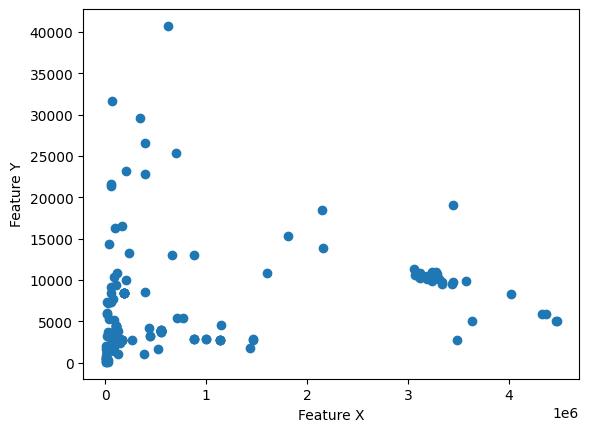

In [5]:
plt.scatter(train_data['x'], train_data['y'])
plt.xlabel('Feature X')
plt.ylabel('Feature Y')

In [6]:
# FUNCTIONS

# function to generate centroids based on means of each label gives centroids a regular output with higher accuracy
def generate_centroids(k, groups):
    centroids = []
    
    for i in range(k):
        label_data = train_data[train_data["labels"]==groups[i]]
        centroids.append([label_data["x"].mean(), label_data["y"].mean()])

    centroids = np.array(centroids)
    return centroids


# function to change the positions of the centroids based on train_data points
def find_groups(centroids, dataset):
    cl1 = []
    cl2 = []
    cl3 = []
    
    for i in range(dataset.shape[0]):
        
        distance1 = np.sqrt(np.abs(dataset.iloc[i, 0] - centroids[0,0]) ** 2 + np.abs(dataset.iloc[i, 1] - centroids[0,1]) ** 2)
        distance2 = np.sqrt(np.abs(dataset.iloc[i, 0] - centroids[1,0]) ** 2 + np.abs(dataset.iloc[i, 1] - centroids[1,1]) ** 2)
        distance3 = np.sqrt(np.abs(dataset.iloc[i, 0] - centroids[2,0]) ** 2 + np.abs(dataset.iloc[i, 1] - centroids[2,1]) ** 2)
        
        distances = [distance1, distance2, distance3]
        
        if np.argmin(distances) == 0:
            cl1.append([dataset.iloc[i, 0], dataset.iloc[i, 1]])
        elif np.argmin(distances) == 1:
            cl2.append([dataset.iloc[i, 0], dataset.iloc[i, 1]])
        elif np.argmin(distances) == 2:
            cl3.append([dataset.iloc[i, 0], dataset.iloc[i, 1]])

    cl1 = np.array(cl1)
    cl2 = np.array(cl2)
    cl3 = np.array(cl3)

    return cl1, cl2, cl3

### Task 1: Find the Centroid point of each of the three groups (3)

In [7]:
# ANSWER
# Get number of clusters from pre-defined labels
k = len(train_data["labels"].unique())
groups = train_data["labels"].unique()

centroids = generate_centroids(k, groups)

# print starting centroids
print("Starting Centroids:")
print(centroids)

# creating groups and dataset
cl1 = []
cl2 = []
cl3 = []
# dataset = train_data[["x", "y"]]

# finding initial groups using function
cl1, cl2, cl3 = find_groups(centroids, train_data)

# updating initial centroids
centroids = np.array([np.mean(cl1, axis=0), np.mean(cl2, axis=0), np.mean(cl3, axis=0)])
previous_centroids = centroids

# loop to refine centroid locations until they equal previous ones meaning they cannot improve anymore
loop = 1
while loop != -1:
    dataset = pd.DataFrame(np.vstack([cl1, cl2, cl3])) # create dataset from previous groups

    cl1, cl2, cl3 = find_groups(centroids, dataset) # create new groups based on new centroid positions

    centroids = np.array([np.mean(cl1, axis=0), np.mean(cl2, axis=0), np.mean(cl3, axis=0)]) # create new centroids based on the group 

    # if centroids are the same as previous accuracy cannot improve by repeated loops
    if previous_centroids.all() == centroids.all():
        loop = -1
    else:
        previous_centroids = centroids

# print refined centroids
print("Refined Centroids:")
print(centroids)

Starting Centroids:
[[2181660.66   11087.1 ]
 [ 478778.12    3754.04]
 [ 100505.22    6158.28]]
Refined Centroids:
[[3380936.89655172    9852.79310345]
 [ 794961.46341463    6994.36585366]
 [  92582.625         5968.3875    ]]


### Task 2: Plot the centroids on a Scatter Plot against the train data colour-coded by group (3)

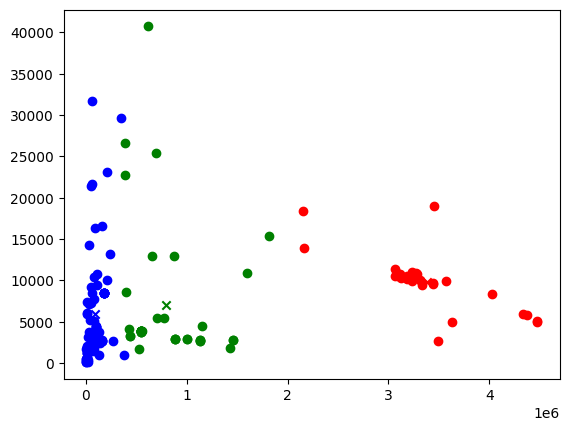

In [8]:
# ANSWER

# plot clusters/groups
plt.scatter(cl1[:,0], cl1[:,1], color="r")
plt.scatter(cl2[:,0], cl2[:,1], color="g")
plt.scatter(cl3[:,0], cl3[:,1], color="b")

# plot centroids
plt.scatter(centroids[0,0], centroids[0,1], marker="x", color="r")
plt.scatter(centroids[1,0], centroids[1,1], marker="x", color="g")
plt.scatter(centroids[2,0], centroids[2,1], marker="x", color="b")

### Task 3: For each item in test_data, measure the distance to each centroid point, assign membership to the group of minimum distance, and compare with the expected test data label to obtain a score of successful classifications (12)

*Hint: You may find the clustering activity worksheet helpful for how to approach this task*

In [9]:
# ANSWER
def get_label_counts(clusters):
    # printing cluster sizes
    print("Cluster Sizes:")
    print(len(clusters[0]))
    print(len(clusters[1]))
    print(len(clusters[2]))

    label_counts = []

    for c in range(len(clusters)): # looping through all clusters
        temp_labels = [] # resetting temp labels

        for cluster_data in clusters[c]: # looping through specific cluster 
            
            tLabel = test_data[(test_data["x"]==cluster_data[0]) & (test_data["y"]==cluster_data[1])]["labels"].values[0]
            temp_labels.append(tLabel)
            
        label_counts.append(temp_labels) # append temp labels to all labels group

    return label_counts

# make new clusters for test data based on predefined centroids
t_cl1 = []
t_cl2 = []
t_cl3 = []

# find clusters for test_data
t_cl1, t_cl2, t_cl3 = find_groups(centroids, test_data)

# add clusters to list
test_clusters = [t_cl1, t_cl2, t_cl3]

# get counts of labels from test clusters
label_counts = get_label_counts(test_clusters) # retrieve labels from test clusters

# creating dataframes for labels of each cluster
labels_cl1 = pd.DataFrame(label_counts[0])
labels_cl2 = pd.DataFrame(label_counts[1])
labels_cl3 = pd.DataFrame(label_counts[2])

# printing value counts of each cluster
print("\nCluster 1 Count:")
print(labels_cl1.value_counts())
print("\nCluster 2 Count:")
print(labels_cl2.value_counts())
print("\nCluster 3 Count: ")
print(labels_cl3.value_counts())

# Printing score of successful classifications
correct_classified = (labels_cl1.value_counts()[0] + labels_cl2.value_counts()[0] + labels_cl3.value_counts()[0])
print("\nCorrectly classifier items: " + str(correct_classified))

Cluster Sizes:
14
20
56

Cluster 1 Count:
wannacry    14
dtype: int64

Cluster 2 Count:
startsurf    15
wannacry      5
dtype: int64

Cluster 3 Count: 
razy         30
startsurf    15
wannacry     11
dtype: int64

Correctly classifier items: 59


### Task 4: Provide a final accuracy score for the performance of your "by hand" classifier (2)

In [10]:
# ANSWER
# *Using highest number classifier in each cluster as correct
totallength = len(t_cl1) + len(t_cl2) + len(t_cl3)
accuracy = (correct_classified/totallength)*100

print("Correctly classifier items: " + str(correct_classified))

print("Accuracy (rounded to nearest %): " + str(round(accuracy)) + "%")

Correctly classifier items: 59
Accuracy (rounded to nearest %): 66%


## Part 2: Developing a large-scale ML classifier

We will now extend the earlier principles for the full dataset. Essentially the task is the same, we want to find the parameters that allow us to clearly separate groups for classification.

### Task 5: Scale the Input Features for further processing using the StandardScaler function (1)

In [11]:
# ANSWER
# import libraries
from sklearn.preprocessing import StandardScaler

# define scaler and fit to features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

print(scaled_features)

[[-0.0978198   0.67215876  0.82663021 ...  0.1357412   0.17814439
   0.40617301]
 [-0.35508456 -0.29156716 -0.27456922 ... -0.16889972 -0.21809863
  -0.2386657 ]
 [-0.35178418  0.37984379  0.24155808 ...  0.21077877  0.19202385
  -0.23072864]
 ...
 [-0.35058059 -0.37961299 -0.38237754 ... -0.31013839 -0.34541401
  -0.26045037]
 [-0.34595246  0.01402847 -0.18442612 ... -0.37112451 -0.38225198
  -0.24646054]
 [-0.37642742 -0.42802765 -0.47665936 ... -0.37851238 -0.39247895
  -0.27324031]]


### Task 6: Obtain numerical labels for each class using the LabelEncoder function (1)

In [12]:
# ANSWER
# import libraries
from sklearn import preprocessing

# define encoder and fit to labels
Encoder = preprocessing.LabelEncoder()
encoded_labels = Encoder.fit_transform(labels)

print(encoded_labels)

[ 7  7  7 ... 13 13 13]


c:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### (Advanced) Task 7: Prepare the dataset for ML testing, using the Train-Test-Split function of sklearn (2)

In [13]:
# ANSWER
# import libraries
from sklearn.model_selection import train_test_split

# creating test train split from scaled data and encoded labels
x_train, x_test, y_train, y_test = train_test_split(scaled_features, encoded_labels)

### (Advanced) Task 8: Use a Multi-Layer Perceptron (MLP) classifier to train a machine learning model, and obtain the accuracy score against your test data. (4)

In [14]:
# ANSWER
# import libraries
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

# fit classifier to train data
clf = MLPClassifier(max_iter=30).fit(x_train, y_train)
# predict from classifier
predict = clf.predict(x_test)

# print accuracy
print(accuracy_score(y_test, predict))

0.7361428571428571


c:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


### (Advanced) Task 9: Use a Random Forest (RF) classifier to train a machine learning model, and obtain the accuracy score against your test data. (4)

In [15]:
# ANSWER
# import libraries
from sklearn.ensemble import RandomForestClassifier

# fit classifier to train data
rfc = RandomForestClassifier().fit(x_train, y_train)
# predict from classifier
predict = rfc.predict(x_test)

# print accuracy
print(accuracy_score(y_test, predict))

0.8721428571428571


### (Advanced) Task 10: Show how ML parameters can improve the models to achieve a high accuracy score of over 80% (3)

*Marks wil be awarded for how your tuning improves accuracy beyond 80%.*

In [19]:
# ANSWER
# import required libraries
from sklearn.model_selection import GridSearchCV
# Grid Searches can be used to train hyperparameters for the two different classifiers allowing us to find optimums
# Both classifiers produce accuracy results over 80%

# completing grid search for multi layer perceptron
params = {
    "max_iter" : [250, 300],
    "learning_rate" : ["adaptive", "constant"]}

mlpGS = GridSearchCV(MLPClassifier(random_state=0), param_grid=params, scoring="accuracy", cv=2, n_jobs=-1)
mlpGS.fit(x_train, y_train)


# completing grid search for random forest classifier
params = {
    "n_estimators" : [200, 400],
    "max_depth" : [30, 50]}

# using grid search to check best parameters
rfcGS = GridSearchCV(RandomForestClassifier(random_state=2), param_grid=params, scoring="accuracy", cv=2, n_jobs=-1)
rfcGS.fit(x_train, y_train)


print("\nMulti Layer Perceptron: ")
print("Accuracy: " + str(mlpGS.best_score_*100))
print("Best Parameters: " + str(mlpGS.best_params_))

print("\nRandom Forest Classifier: ")
print("Accuracy: " + str(rfcGS.best_score_*100))
print("Best Parameters: " + str(rfcGS.best_params_))

# *Note grid search does take some time to run, code is still working if timer is increasing

c:\Users\camer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(



Multi Layer Perceptron: 
Accuracy: 80.37619047619047
Best Parameters: {'learning_rate': 'adaptive', 'max_iter': 250}

Random Forest Classifier: 
Accuracy: 86.02380952380952
Best Parameters: {'max_depth': 30, 'n_estimators': 400}
